In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### **Explanation:**  
1. **`import pandas as pd`**  
   - Imports the **Pandas** library (used for data manipulation and analysis) and assigns it the alias `pd` (a common shorthand).  
   - Pandas provides tools like **DataFrames** and **Series** for handling structured data (e.g., CSV files, Excel sheets).  

2. **`import numpy as np`**  
   - Imports the **NumPy** library (used for numerical computing) and assigns it the alias `np`.  
   - NumPy offers support for **arrays, matrices, and mathematical functions**, making it essential for scientific computing.  

### **Common Use Cases:**  
- **Pandas (`pd`):** Data cleaning, filtering, grouping, and analysis.  
- **NumPy (`np`):** Mathematical operations, linear algebra, and array processing.  

Let me know if you'd like examples of how to use them! 😊

In [2]:
df = pd.read_csv('Data_fake_or_real_news.csv')
df

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


### **Explanation:**  
1. **`df = pd.read_csv('Data_fake_or_real_news.csv')`**  
   - **Reads a CSV file** named `'Data_fake_or_real_news.csv'` into a Pandas **DataFrame** (`df`).  
   - DataFrames are **tabular structures** (like Excel sheets) for storing and analyzing data.  

2. **`df`**  
   - Displays the **first 5 rows and last 5 rows** of the DataFrame (`df`).

## EDA

In [3]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

***Counts occurrences of each unique value in the `label` column (e.g., `FAKE: 3164, REAL: 3171`). That means the dataset is balanced.***

In [4]:
df.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

**No Null field in this Dataset.**

In [5]:
x = df['text']
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [6]:
y = df['label']
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

## Train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [8]:
X_train

1142    Donald Trump received a key endorsement for hi...
2654    Nina November 6, 2016 @ 2:39 pm \nPolish gover...
5395    Time: Investigating Hillary is an Attack on Al...
1170    Taki's Magazine October 28, 2016 \nThis electi...
4371    Pakistan Pakistan's cricketer turned politicia...
                              ...                        
3772    What happened was less a debate among contende...
5191    Clinton, FBIGate and the true depth of the Oba...
5226    Fearing Election Day Trouble, Some US Schools ...
5390    President Obama’s appearance at a town hall me...
860     A man protests against international trade agr...
Name: text, Length: 5068, dtype: object

In [9]:
y_train

1142    REAL
2654    FAKE
5395    FAKE
1170    FAKE
4371    FAKE
        ... 
3772    REAL
5191    FAKE
5226    FAKE
5390    REAL
860     FAKE
Name: label, Length: 5068, dtype: object

In [10]:
X_test

1357    Will Trump pull a Brexit times ten? What would...
2080    Clintons Are Under Multiple FBI Investigations...
2718    Dispatches from Eric Zuesse This piece is cros...
812     Print \n[Ed. – Every now and then the facade c...
4886    Nanny In Jail After Force Feeding Baby To Deat...
                              ...                        
1512    Tennessee Children with Brittle Bones Suffer i...
57      Political parties choose their presidential no...
6092    The Islamist terrorist attacks that took place...
3403    About 90 minutes before the vice-presidential ...
292     Remember last fall, when pundits and politicia...
Name: text, Length: 1267, dtype: object

In [11]:
y_test

1357    FAKE
2080    FAKE
2718    FAKE
812     FAKE
4886    FAKE
        ... 
1512    FAKE
57      REAL
6092    REAL
3403    REAL
292     REAL
Name: label, Length: 1267, dtype: object

In [12]:
X_train.values

array(['Donald Trump received a key endorsement for his immigration platform: Sen. Jeff Sessions, one of the strongest proponents in Congress of restricting immigration.',
       'Nina November 6, 2016 @ 2:39 pm \nPolish government and common people (except liberal and leftist opposition which lost everything in last year election) pray for Trump to be the president of USA. Dubi November 6, 2016 @ 2:25 pm \nWith bitches like this hillary fan America is lost if she wins. She is lucky I wasn’t that cop who has the patience of Job, because I don’t! GO TRUMP! ! ! \nWATCH: Video of Obnoxious Trump-Hater Getting Justice Explodes…6 MILLION Views This obnoxious Donald J. Trump hater has gone viral in a major way, and it’s not good. Here’s what happened to this anti-Trumper on video that has netted her six million views… This is AWESOME! Read more…',
       "Time: Investigating Hillary is an Attack on All Women November 1, 2016 \nGood morning. It's Tuesday. \nWho's up for another silly attempt 

In [13]:
X_train.values.shape

(5068,)

## Bag of Words

**Since the data is in the form of strings, a machine cannot directly process it. To make the data understandable and provide it as input to the machine, we absolutely need to use numerical data.**

**Therefore, we will perform encoding or feature extraction on this string data using a concept called Bag of Words. In this method, the machine first identifies all the unique words present in the entire X_train dataset. Then, it arranges these unique words in ascending order. Following this, for each news article within X_train, the machine counts the occurrences of each unique word and organizes this information into a table. This table essentially shows which words are present in each news article and how many times they appear. This entire concept is known as Bag of Words.**

### Example

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV

news = [
    "Fake news spreads quickly",
    "Real news comes from facts",
    "Fake articles are misleading"
]

vectorizer = TV()
X = vectorizer.fit_transform(news)


print(vectorizer.get_feature_names_out())
print(X.toarray())


['are' 'articles' 'comes' 'facts' 'fake' 'from' 'misleading' 'news'
 'quickly' 'real' 'spreads']
[[0.         0.         0.         0.         0.42804604 0.
  0.         0.42804604 0.5628291  0.         0.5628291 ]
 [0.         0.         0.46735098 0.46735098 0.         0.46735098
  0.         0.35543247 0.         0.46735098 0.        ]
 [0.52863461 0.52863461 0.         0.         0.40204024 0.
  0.52863461 0.         0.         0.         0.        ]]


In [15]:
news

['Fake news spreads quickly',
 'Real news comes from facts',
 'Fake articles are misleading']

### Let's go back to the main project.

In [16]:
v = TV()

X_train_cv = v.fit_transform(X_train)
X_train_cv

<5068x61667 sparse matrix of type '<class 'numpy.float64'>'
	with 1713334 stored elements in Compressed Sparse Row format>

1. **"1713334 stored elements"** means there are 1713334 non-zero values across the 'X_tarin.shape' matrix (5068 news, 61667 unique words), indicating word counts.  
2. Sparse matrices store only non-zero values to save memory, so most entries (zeros) are skipped.

In [17]:
X_train_cv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X_train_cv.shape

(5068, 61667)

In [19]:
X_train_cv[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_train_cv[0].shape

(1, 61667)

In [21]:
v.get_feature_names_out()

array(['00', '000', '0000', ..., 'תתרכז', 'القادمون', 'عربي'],
      dtype=object)

In [22]:
X_train_df=pd.DataFrame(X_train_cv.toarray(), columns=v.get_feature_names_out())
X_train_df

,00,000,0000,000000031,00000031,0001,0002,000billion,000ft,000km,...,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# pd.set_option('display.max_columns', None)
# X_train_df
# to show full dataset

In [24]:
# v.vocabulary_

### Train the Naive Bayes model

In [25]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df, y_train)

MultinomialNB()

### Evaluate Performance

In [26]:
X_test_cv = v.transform(X_test)

In [27]:
X_test_cv.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00562613, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
X_test_cv.toarray().shape

(1267, 61667)

In [29]:
model.score(X_test_cv, y_test)

0.8168902920284136

In [30]:
x_countV = v.transform(df['text'])

In [31]:
x_countV.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00753231, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01131732, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Cross validation

In [32]:
from sklearn.model_selection import cross_val_score
CV_ScoresNB = cross_val_score(model, x_countV, y, cv=5)
CV_ScoresNB

array([0.8074191 , 0.8074191 , 0.80662983, 0.81610103, 0.80662983])

In [33]:
CV_ScoresNB.mean()

0.8088397790055248

### Decision tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
dect.fit(X_train_df, y_train)

DecisionTreeClassifier()

In [35]:
dect.score(X_test_cv, y_test)

0.8097868981846882

In [36]:
# CV_ScoresDT = cross_val_score(dect, x_countV, y, cv=5)
# CV_ScoresDT   # Around 80%

In [37]:
#CV_ScoresDT.mean()

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train_df, y_train)

LogisticRegression()

In [39]:
LR_model.score(X_test_cv, y_test)

0.9139700078926598

In [40]:
CV_ScoresLR = cross_val_score(LR_model, x_countV, y, cv=5)
CV_ScoresLR

array([0.91633781, 0.91081294, 0.91712707, 0.91397001, 0.91712707])

In [41]:
CV_ScoresLR.mean()

0.9150749802683504

## SVM

In [42]:
from sklearn.svm import LinearSVC

# SVM Model
SVM_model = LinearSVC()

# Train
SVM_model.fit(X_train_df, y_train)

# Test Score
SVM_model.score(X_test_cv, y_test)

0.9384372533543804

In [43]:
CV_ScoresSVM = cross_val_score(SVM_model, x_countV, y, cv=5)
CV_ScoresSVM


array([0.94159432, 0.93606946, 0.93685872, 0.94159432, 0.93843725])

In [44]:
CV_ScoresSVM.mean()


0.9389108129439622

### Hyper Parameter Tuning

In [45]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.01, 0.1, 1, 10],
#     'loss': ['hinge', 'squared_hinge'],
#     'penalty': ['l2'],  # 'l1' দিলে dual=False দিতে হবে
#     'dual': [True, False],
#     'max_iter': [1000, 3000, 5000],
#     'class_weight': [None, 'balanced']
# }

# grid = GridSearchCV(LinearSVC(), param_grid, cv=5)
# grid.fit(x_countV, y)

# print("Best Parameters:", grid.best_params_)
# print("Best Score:", grid.best_score_)

### Score for SVM

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred = SVM_model.predict(X_test_cv)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))


Confusion Matrix:
[[595  33]
 [ 45 594]]

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94       628
        REAL       0.95      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



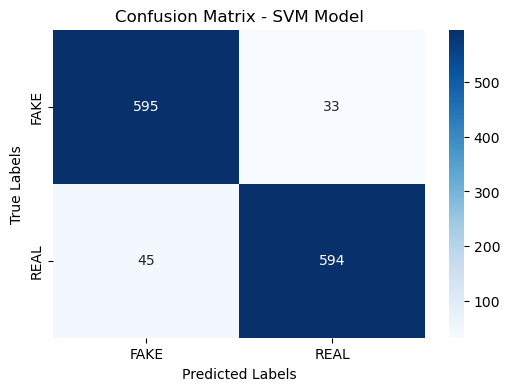

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on test set
y_pred = SVM_model.predict(X_test_cv)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Model')
plt.show()


In [66]:
# https://www.bbc.com/news/articles/c3d44mn9y8ko # real news
nn = [
    
''' 
Basic water utility fees will be waived for residents of Tokyo this summer in an effort to limit the impact of extreme heat, the Tokyo Metropolitan Government has announced.

More than ¥36bn ($250m; £186m) has been set aside for the subsidies, which will come into effect for a four-month period.

"We would like to create an environment in which all Tokyoites can live in peace even in the extremely hot weather we are expected to experience this summer," Tokyo Governor Yuriko Koike said.

Heatstroke claimed a record 263 lives in Tokyo last summer, according to the Bureau of Public Health. Many victims did not have air conditioning or chose not to use it because of high costs.
"Due to anxieties over living (costs), there may be cases in which people don't use their air conditioners during a heat wave even though they own one," Koike added.

By offsetting water costs, the government aims to encourage residents of the Japanese capital to use other cooling methods like air conditioning.

In more than 60% of heatstroke deaths recorded indoors last summer, the victims had not turned air conditioning on, the Tokyo Fire Department said, according to the Japan Times.

On average, base water fees in Tokyo cost between ¥860 ($6; £4.50) to ¥1,460 ($10; £7.50) per month, depending on the width of the household's water pipe.

Additional fees - based on water usage and paid on top of base fees - will be charged at their usual rate.

Tokyo has more than 7 million households and a population of more than 14 million, according to government statistics.

Japan recorded its hottest summer on record last year.

Temperatures in June, July and August were 1.76 degrees higher than the average between 1991 and 2020, according to the Japan meteorological agency.

Between June and September, nearly 8,000 people in Tokyo were taken to hospitals for heatstroke - also a record - with a majority of deaths recorded among elderly people.


''' ,

''' In a groundbreaking announcement today, NASA revealed the discovery of a vast underground freshwater lake on Mars that could potentially support human life. The water source, located beneath the southern polar ice cap, was confirmed using high-resolution radar imaging from the Mars Reconnaissance Orbiter. Scientists believe this changes the timeline for manned Mars missions significantly, with permanent human settlements on Mars now projected to begin as early as 2028.
Dr. Michael Thomson, head of the Mars Exploration Team, stated, “This is the most compelling evidence of a habitable environment beyond Earth we’ve found so far.”
Governments around the world, including the USA, China, and India, have announced plans to accelerate Mars colonization programs in response.
'''
]

In [67]:
nn_tfidf = v.transform(nn)
nn_tfidf.toarray().shape

(2, 61667)

In [68]:
nn_tfidf.toarray()

array([[0.        , 0.02649462, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
SVM_model.predict(nn_tfidf.toarray())

array(['REAL', 'FAKE'], dtype=object)

In [46]:
# pip install xgboost

In [47]:
# from sklearn.preprocessing import LabelEncoder

# # Create encoder instance
# le = LabelEncoder()

# # Encode the labels
# y_train_encoding = le.fit_transform(y_train)

# # Optional: Check the mapping
# print(dict(zip(le.classes_, le.transform(le.classes_))))

In [48]:
# # Create encoder instance
# le = LabelEncoder()

# # Encode the labels
# y_test_encoding = le.fit_transform(y_test)

# # Optional: Check the mapping
# print(dict(zip(le.classes_, le.transform(le.classes_))))

In [49]:
# from xgboost import XGBClassifier

# # XGBoost Model
# XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # Train
# XGB_model.fit(X_train_df, y_train_encoding)

# # Test Score
# XGB_model.score(X_test_cv, y_test_encoding)

0.4711917916337806